## Introduction to Neural Network Classification with TF
In this notebook we are going to learn how to write neural networks for classification problems.
A classification is where we try to classify something as one thing or another.

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [3]:
# Checking labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
# Our data is a little hard to understand like this right now so lets visualize it.
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


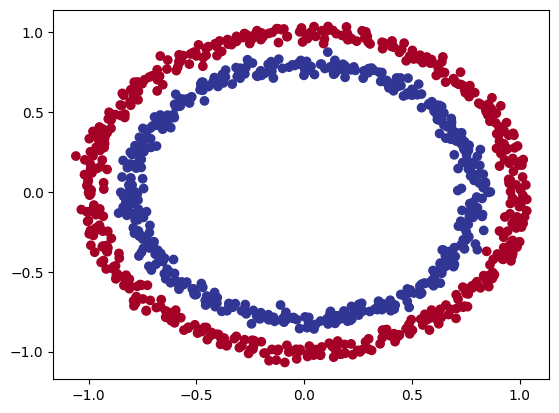

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Check the shape of our features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [7]:
# View the first sample
X[0], y[0] # so we want to take the X data to predict the y data. 2 features for 1.

(array([0.75424625, 0.23148074]), np.int64(1))

### simple modelling

In [8]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# Creating the model using the sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.4780 - loss: 1.0433
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.4890 - loss: 0.7077
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.4920 - loss: 0.6982
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.4930 - loss: 0.6954
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.4890 - loss: 0.6946


In [9]:
# Lets try improving our model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [10]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.5000 - loss: 0.6932


[0.6932482719421387, 0.5]

In [11]:
# We have to introduce Non-Linearity 

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5010 - loss: 0.6906   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.5010 - loss: 0.6901
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.5080 - loss: 0.6897
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.5080 - loss: 0.6894
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.5110 - loss: 0.6891
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.5140 - loss: 0.6887
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.5100 - loss: 0.6884
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.5100 - loss: 0.6881
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.5120 - loss: 0.6877
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.5150 - loss: 0.6874
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.5180 - loss: 0.6870
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [12]:
model_3.evaluate(X, y) # Adding hidden layer relu and outer layer sigmoid really did help increase the accuracy

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7460 - loss: 0.5477


[0.5476763248443604, 0.7459999918937683]

In [13]:
# Use NON linear activation functions inside hidden layers always, be it regression or classification.
# Only in output layer for regression you dont need an activation func but for classification if binary then sigmoid and if multiclass then softmax.

### Improving the model with train/test split

In [14]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [15]:
# Lets recreate a model to fit on the training data and evaluate on the testing data!
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy', 'precision', 'recall'])

history = model_4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5387 - loss: 0.6889 - precision: 0.5376 - recall: 0.5711   
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5487 - loss: 0.6827 - precision: 0.5435 - recall: 0.6234 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6450 - loss: 0.6757 - precision: 0.6370 - recall: 0.6783 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7100 - loss: 0.6643 - precision: 0.7584 - recall: 0.6185 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7038 - loss: 0.6438 - precision: 0.7847 - recall: 0.5636
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.7688 - loss: 0.6064 - precision: 0.8354 - recall: 0.6708
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8025 - loss: 0.5471 - precision: 0.8605 - recall: 0.7232 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9038 - loss: 0.4634 - precision: 0.9332 - recall: 0.8703 
Epoch 9/25
25/25 ━━━

In [16]:
model_4.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0558 - precision: 0.9802 - recall: 1.0000  


[0.055753618478775024, 0.9900000095367432, 0.9801980257034302, 1.0]

In [17]:
# Using the history variable to plot a loss curve
pd.DataFrame(history.history)

,accuracy,loss,precision,recall
0,0.53875,0.688922,0.537559,0.571072
1,0.54875,0.682665,0.543478,0.623441
2,0.64500,0.675712,0.637002,0.678304
3,0.71000,0.664268,0.758410,0.618454
4,0.70375,0.643801,0.784722,0.563591
5,0.76875,0.606377,0.835404,0.670823
6,0.80250,0.547121,0.860534,0.723192
7,0.90375,0.463356,0.933155,0.870324
8,0.96250,0.372864,0.967254,0.957606
9,0.97500,0.298124,0.977444,0.972569


Text(0.5, 1.0, 'Model_4 loss curves')

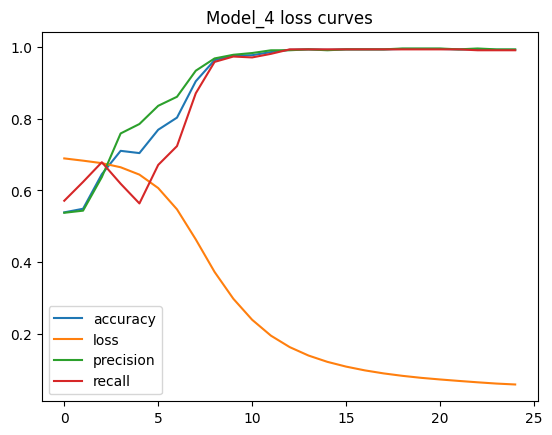

In [18]:
pd.DataFrame(history.history).plot()
plt.title("Model_4 loss curves")

In [19]:
# For many problems the loss function going down means the model is improving.

### Using callbacks to find the model's best learning rate

In [47]:
# Set random seed
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',      # what metric to watch
    patience=20,              # how many epochs to wait before stopping
    restore_best_weights=True  # revert to best model weights
)

history_5 = model_5.fit(
    X_train, y_train,
    epochs=500,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5172 - loss: 0.6940 - val_accuracy: 0.4563 - val_loss: 0.6943
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5188 - loss: 0.6927 - val_accuracy: 0.4437 - val_loss: 0.6954
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - loss: 0.6918 - val_accuracy: 0.4375 - val_loss: 0.6964
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4969 - loss: 0.6911 - val_accuracy: 0.4313 - val_loss: 0.6971
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5031 - loss: 0.6906 - val_accuracy: 0.4187 - val_loss: 0.6976
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5125 - loss: 0.6902 - val_accuracy: 0.4187 - val_loss: 0.6979
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - loss: 0.6898 - val_accuracy: 0.4187 - val_loss: 0.6981
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5188 - loss: 0.6894 - val_accuracy: 0.4187 - v

In [48]:
model_5.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4750 - loss: 0.6951 


[0.6950527429580688, 0.4749999940395355]

In [49]:
# Making a confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model_5.predict(X_test)

confusion_matrix(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [50]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [51]:
y_pred[:10] # Looks like our predictions array are in predictions probability form, the standard output from the sigmoid or softmax acti functions

array([[0.5036837 ],
       [0.49339458],
       [0.5009828 ],
       [0.49251884],
       [0.5016891 ],
       [0.49673736],
       [0.49673736],
       [0.4898976 ],
       [0.51796925],
       [0.51646876]], dtype=float32)

In [52]:
tf.round(y_pred)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
 

In [53]:
confusion_matrix(y_test, tf.round(y_pred))

array([[68, 33],
       [72, 27]])

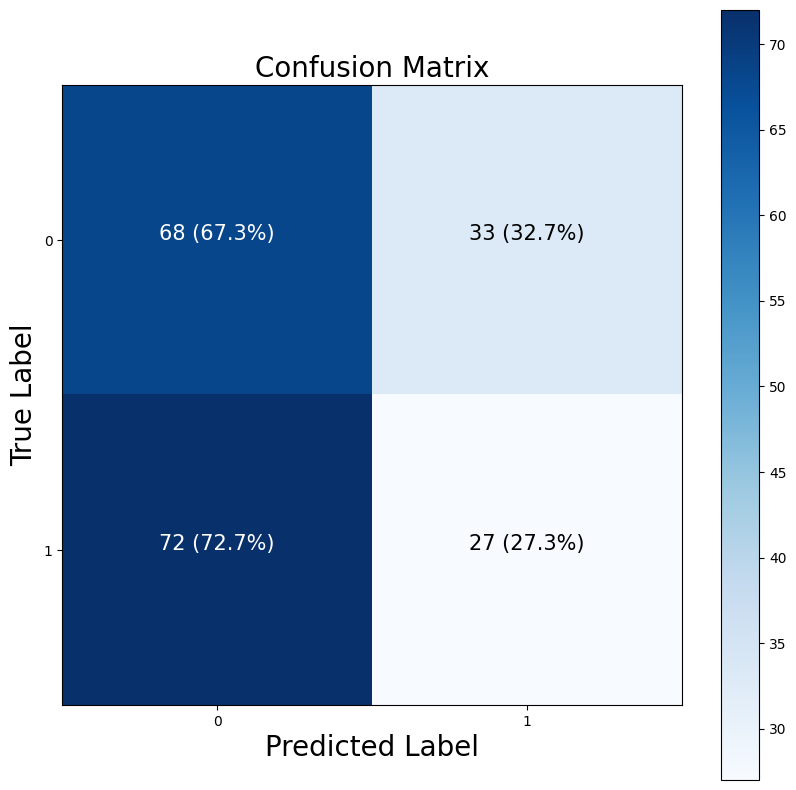

In [54]:
import itertools
import numpy as np
figsize = (10,10)

cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment='center',
             color="white" if cm[i,j] > threshold else "black",
             size=15)


### Multiclass Classification
When we have more than two classes as an option, its known as multiclass classfication

In [25]:
# To practice multi-class classification, we're going to use the fashion MNIST dataset.
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# This data has already been sorted into training and test sets for us to practice.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [26]:
# Show the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [27]:
# Lets check the shape of a single example.
train_data[0].shape, train_labels[0].shape

((28, 28), ())

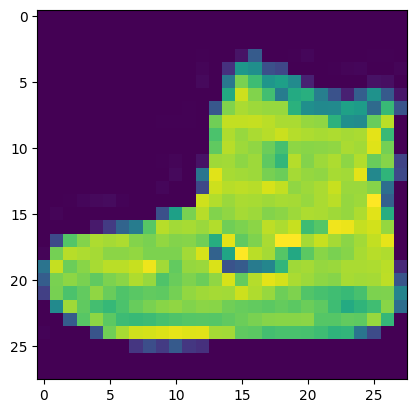

In [30]:
# Lets plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [32]:
# Create a small list so we can index onto our training label so they're human-readable/
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/Top')

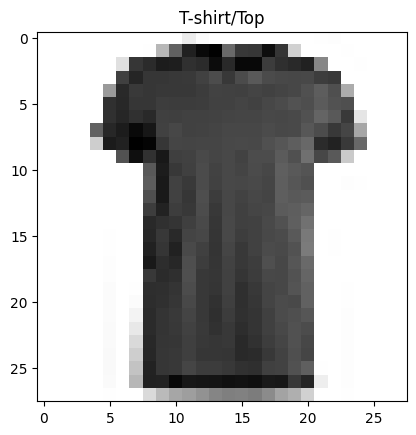

In [33]:
# plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

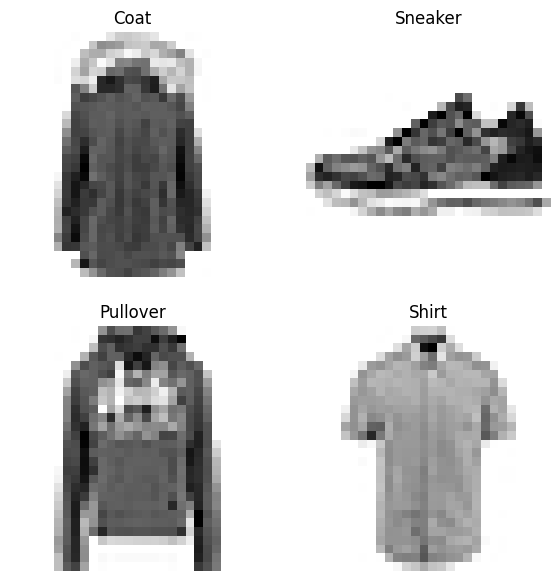

In [41]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [43]:
# Bulding the Model
# The input shape is 28 x 28, the output shape is 10 ( one per class of clothing)

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Neural network likes one long vector
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# For labels that are one hot encoded with use CategoricalCrossentropy but for labels that are integers we
# should use SparseCategoricalCrossentropy

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model_6.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - accuracy: 0.1176 - loss: 2.2955 - val_accuracy: 0.1912 - val_loss: 2.0337
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.2410 - loss: 1.8099 - val_accuracy: 0.2621 - val_loss: 1.7146
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.2662 - loss: 1.6896 - val_accuracy: 0.2899 - val_loss: 1.6726
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.2905 - loss: 1.6553 - val_accuracy: 0.2750 - val_loss: 1.7134
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.3020 - loss: 1.6308 - val_accuracy: 0.2843 - val_loss: 1.6739
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.3049 - loss: 1.6179 - val_accuracy: 0.2999 - val_loss: 1.6262
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.3077 - loss: 1.6092 - val_accuracy: 0.2808 - val_loss: 1.6998
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.3085 - loss: 1.60

In [44]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [45]:
# Neural networks prefer data to be normalized, this means the numbers in the tensor should be between 0 & 1.
# Here is 0 to 255.

# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
testing_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data.
train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [55]:
# Now our data is normalized, let's build a model to find patterns in it.

tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

norm_history = model_7.fit(train_data_norm, train_labels, epochs = 10, validation_data = (testing_data_norm, test_labels))

Epoch 1/10


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 728us/step - accuracy: 0.6714 - loss: 0.8981 - val_accuracy: 0.7854 - val_loss: 0.6291
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.7927 - loss: 0.5914 - val_accuracy: 0.8002 - val_loss: 0.5829
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8034 - loss: 0.5587 - val_accuracy: 0.8074 - val_loss: 0.5667
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.8097 - loss: 0.5420 - val_accuracy: 0.8097 - val_loss: 0.5572
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.8144 - loss: 0.5302 - val_accuracy: 0.8122 - val_loss: 0.5496
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.8191 - loss: 0.5212 - val_accuracy: 0.8149 - val_loss: 0.5438
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.8216 - loss: 0.5146 - val_accuracy: 0.8159 - val_loss: 0.5405
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.8235 - loss: 0.50

<Axes: title={'center': 'Normalized data'}>

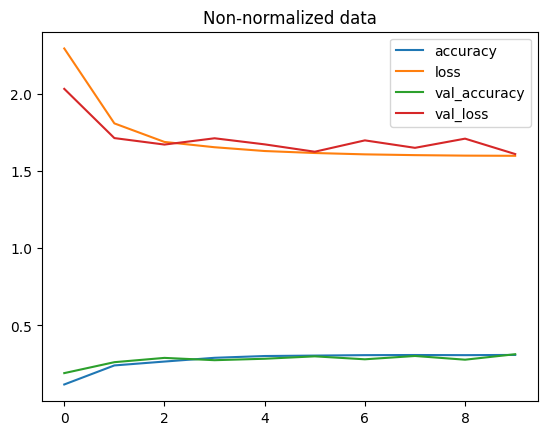

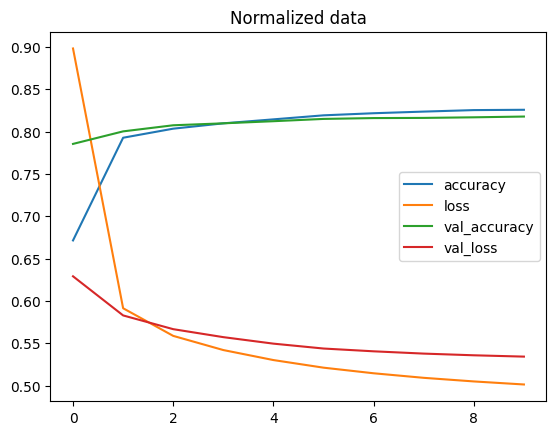

In [57]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [58]:
# Finding the ideal learning rate
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lt_history = model_8.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data,test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.6660 - loss: 0.9235 - val_accuracy: 0.7258 - val_loss: 87.3128 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.7712 - loss: 0.6369 - val_accuracy: 0.7355 - val_loss: 94.9010 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.7866 - loss: 0.5936 - val_accuracy: 0.7324 - val_loss: 100.2148 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.7959 - loss: 0.5724 - val_accuracy: 0.7292 - val_loss: 105.5716 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.8027 - loss: 0.5574 - val_accuracy: 0.7279 - val_loss: 110.5421 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.8072 - loss: 0.5457 - val_accuracy: 0.7272 - val_loss: 112.8080 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accurac

Text(0.5, 1.0, 'Finding ideal learnin rate')

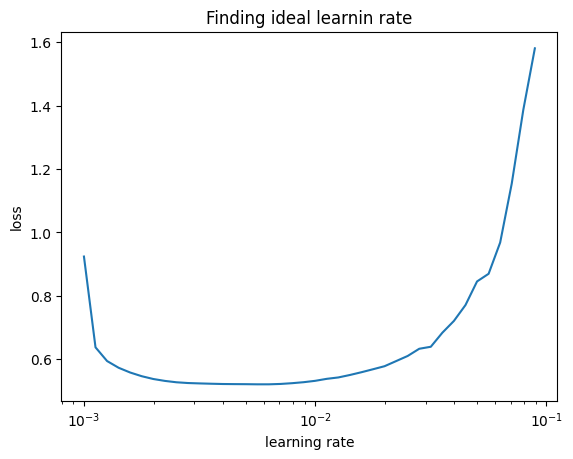

In [59]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lt_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Finding ideal learnin rate")

In [60]:
10**-3

0.001

In [61]:
# Lets refit a model with the ideal learning rate
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data_norm, train_labels, epochs=20, validation_data=(testing_data_norm, test_labels))

Epoch 1/20


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.6368 - loss: 0.9711 - val_accuracy: 0.7456 - val_loss: 0.7507
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.7678 - loss: 0.6855 - val_accuracy: 0.7823 - val_loss: 0.6718
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.7933 - loss: 0.6211 - val_accuracy: 0.7964 - val_loss: 0.6259
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8046 - loss: 0.5796 - val_accuracy: 0.8023 - val_loss: 0.5993
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8109 - loss: 0.5536 - val_accuracy: 0.8072 - val_loss: 0.5813
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8156 - loss: 0.5364 - val_accuracy: 0.8095 - val_loss: 0.5690
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.8189 - loss: 0.5240 - val_accuracy: 0.8121 - val_loss: 0.5594
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.8230 - loss: 0.51